In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from zipfile import ZipFile

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 4317 images belonging to 1 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 4317 images belonging to 1 classes.


CREATE MODEL

In [ ]:
model=Sequential()

Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden
Layers),Output)


In [ ]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300,activation='relu'))

In [ ]:
model.add(Dense(300,activation='relu'))

In [ ]:
model.add(Dense(5,activation="softmax"))

Compile The Model


In [ ]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [ ]:
len(x_train)

180

Fit the model

In [ ]:
model.fit(x_train,epochs=4,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/4
180/180 [==============================] - 498s 3s/step - loss: 316570.0312 - accuracy: 0.2004 - val_loss: 1397082.6250 - val_accuracy: 0.0000e+00
Epoch 2/4
180/180 [==============================] - 73s 405ms/step - loss: 3690452.0000 - accuracy: 0.2001 - val_loss: 8654508.0000 - val_accuracy: 0.0000e+00
Epoch 3/4
180/180 [==============================] - 73s 406ms/step - loss: 14987809.0000 - accuracy: 0.2001 - val_loss: 24152592.0000 - val_accuracy: 0.0000e+00
Epoch 4/4
180/180 [==============================] - 74s 410ms/step - loss: 40855280.0000 - accuracy: 0.2001 - val_loss: 83296864.0000 - val_accuracy: 0.0000e+00


SAVE THE MODEL

In [26]:
model.save("flower1.h5")

TEST THE MODEL

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [28]:
img=image.load_img("/content/drive/My Drive/flowers/flowers/dandelion/8475758_4c861ab268_m.jpg",target_size=(64,64))

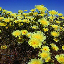

In [29]:
img

In [30]:
x=image.img_to_array(img)

In [31]:
x

array([[[ 35.,  67., 178.],
        [ 35.,  67., 178.],
        [ 36.,  66., 178.],
        ...,
        [ 30.,  63., 178.],
        [ 31.,  64., 179.],
        [ 30.,  63., 178.]],

       [[ 37.,  71., 179.],
        [ 35.,  72., 179.],
        [ 35.,  72., 179.],
        ...,
        [ 32.,  65., 178.],
        [ 31.,  64., 177.],
        [ 33.,  67., 177.]],

       [[ 41.,  76., 180.],
        [ 38.,  77., 182.],
        [ 41.,  75., 183.],
        ...,
        [ 36.,  69., 182.],
        [ 37.,  68., 184.],
        [ 37.,  69., 180.]],

       ...,

       [[ 63.,  48.,  27.],
        [ 69.,  48.,  31.],
        [ 69.,  50.,  35.],
        ...,
        [194., 189.,  69.],
        [184., 168.,  33.],
        [190., 179.,  35.]],

       [[ 83.,  59.,  49.],
        [ 72.,  57.,  36.],
        [ 81.,  55.,  32.],
        ...,
        [104., 102.,   2.],
        [134., 132.,  32.],
        [132., 122.,   0.]],

       [[ 20.,   5.,  10.],
        [ 64.,  35.,  27.],
        [ 49.,  

In [32]:
x.ndim

3

In [33]:
x=np.expand_dims(x,axis=0)

In [34]:
x.ndim

4

In [35]:
pred=model.predict(x)

1/1 [==============================] - 0s 121ms/step


In [36]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [37]:
labels=["daisy","dandelion","rose","sunflower","tulip"]

In [38]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
labels[4]

'tulip'

In [40]:


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
labels[np.argmax(pred)]

'rose'